# Project A

## Problem Statement:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the Titanic sank after
colliding with an iceberg, killing numerous passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there
were not enough lifeboats for the passengers and crew. Although there was
some element of luck involved in surviving the sinking, some groups of people
were more likely to survive than others, such as women, children, and the
upper-class.
In this, we ask you to complete the analysis of what sorts of people were likely
to survive. In particular, we ask you to apply the tools of machine learning to
predict which passengers survived the tragedy

<img src = "https://d6jf304m27oxw.cloudfront.net/titanic-conspiracy-the-ship-that-never-sank/titanic-in-southampton-dock.jpg" alt = "Drawing" width = "400">
<figcaption> <h6> Titanic Ship. </h6>
    
### Definition Key:
|S.No.|Variable |Defination|Key             |
|-----|---------|----------|----------------|
|1    |Survived |Survival  |0 = No, 1 = Yes | 
|2    |Pclass   |Ticket    | class 1 = 1st, 2 = 2nd, 3 = 3rd |
|3    |Sex      |Sex      |-|
|4    |Age      |Age(in years)|-|
|5    |Sibsp    | # of siblings / spouses aboard the
|5    |Parch    | # of parents / children aboard the
|5    |Ticket   |Ticket number|-|
|5    |Fare     |Passenger fare|-|
|5    |Cabin    |Cabin number|-|
|5    |embarked |Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton|

## Importing Libraries and Loading Dataset:

In [1]:
import os

In [2]:
import numpy as np  # data manupulation
import pandas as pd
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("train.csv")

In [4]:
x = pd.crosstab(data.Survived, data.Embarked)
x

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [ ]:
0.5535 0.3896 0.3369

## Data Understanding:

In [4]:
data.shape #Gives the shape of the Dataset provided

(891, 12)

In [5]:
data.head() #Shows us the top 5 rows of our dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe() #Gives us a overview of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum() #Gives is the count of null values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.nunique() #Gives us the count of Unique values in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

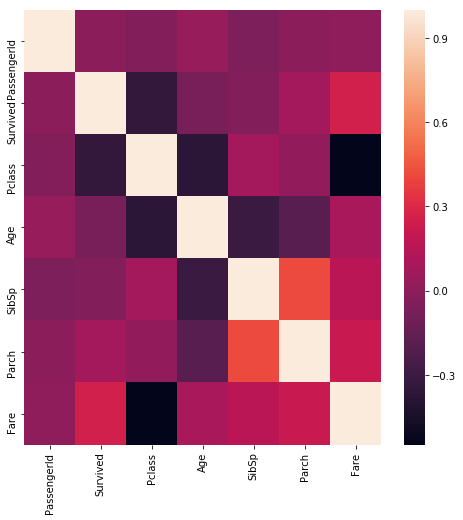

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr()) #Shows us the corelation between each column with each other

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

## Data Visualization:

### For Categorical Data

Text(0.5, 1.0, 'Count of people died and survived w.r.t to Sex')

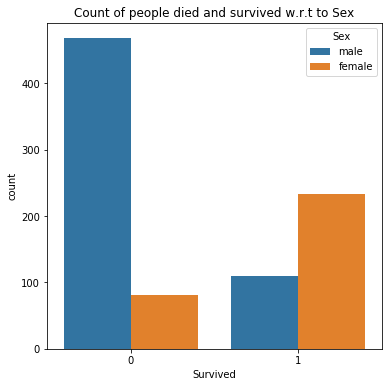

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(data.Survived,hue = data.Sex) #gives us the count of people died and survived w.r.t to Sex
plt.title("Count of people died and survived w.r.t to Sex")

Text(0.5, 1.0, 'Count of people died and survived w.r.t to Pclass')

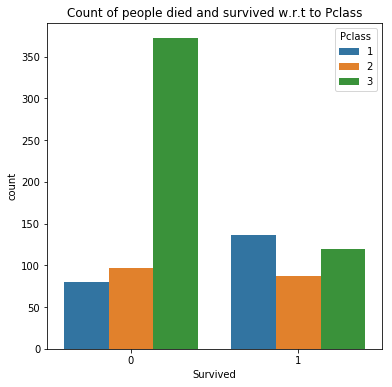

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(data.Survived,hue = data.Pclass) #gives us the count of people died and survived w.r.t to Pclass
plt.title("Count of people died and survived w.r.t to Pclass")

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

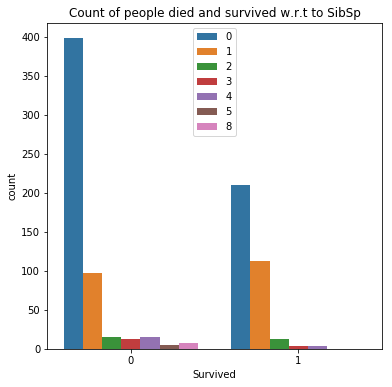

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data.Survived,hue = data.SibSp) #gives us the count of people died and survived w.r.t to SibSp
plt.title("Count of people died and survived w.r.t to SibSp")
plt.legend(loc = "best")
data["SibSp"].value_counts() #Value_count gives us the count the occurrence of each unique value in row

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

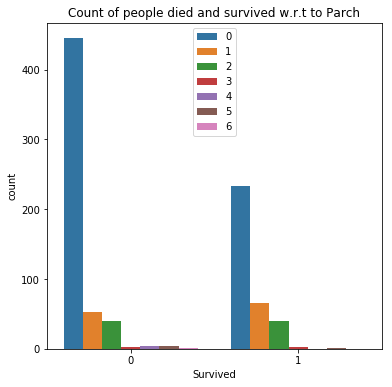

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(data.Survived,hue = data.Parch) #gives us the count of people died and survived w.r.t to Parch
plt.title("Count of people died and survived w.r.t to Parch")
plt.legend(loc = "best") 
data['Parch'].value_counts() #Value_count gives us the count the occurrence of each unique value in row

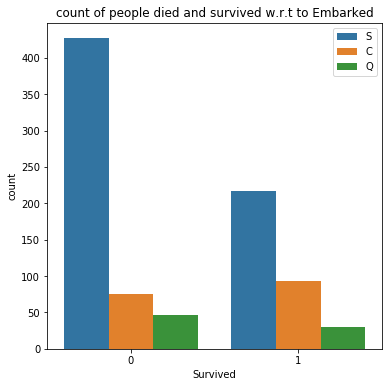

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(data.Survived,hue = data.Embarked) #gives us the count of people died and survived w.r.t to Embarked
plt.title("count of people died and survived w.r.t to Embarked")
plt.legend(loc = "best")

#### NOTE FROM ABOVE GRAPHS:
1) The PClass 1 has more survival then deaths

2) More female have survived


### For Continous Variables:

Text(0.5, 1.0, 'Age of the People W.R.T Survival')

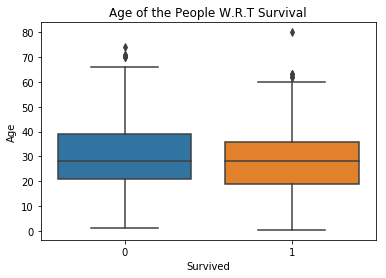

In [15]:
sns.boxplot(y = data["Age"].dropna(), x = data["Survived"])
plt.title("Age of the People W.R.T Survival")

Text(0.5, 1.0, 'Fare Price W.R.T Survival')

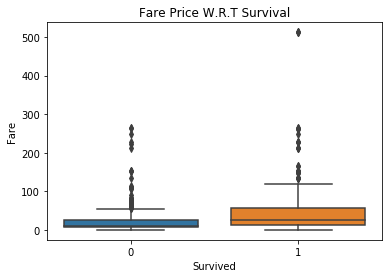

In [16]:
sns.boxplot(y = data["Fare"].dropna(), x = data["Survived"])
plt.title("Fare Price W.R.T Survival")

Text(0.5, 1.0, 'Age of the People W.R.T Survival and the Pclass Ticket they bought')

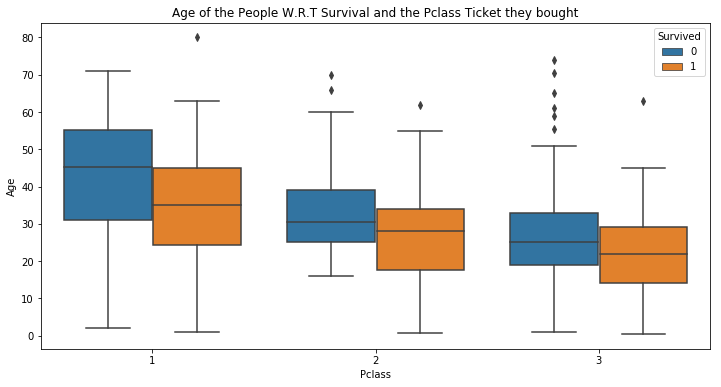

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=data,hue = "Survived")
plt.title("Age of the People W.R.T Survival and the Pclass Ticket they bought")

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

## Data Cleaning:

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

In [18]:
data.groupby(by = "Pclass",axis = 0)["Age"].mean() #gives Mean value of Age w.r.t. to the Pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
#The Function with return mean value of Age w.r.t the Pclass for null values and return there original age for not null values
def avg_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            condition1 = data["Pclass"] == 1
            t = data.loc[condition1,"Age"].mean()
            return t
        elif Pclass == 2:
            condition2 = data["Pclass"] == 2
            t = data.loc[condition2,"Age"].mean()
            return t
        else:
            condition3 = data["Pclass"] == 3
            t = data.loc[condition3,"Age"].mean()
            return t
    else:
        return Age

In [20]:
#Replace the whole column with the fuction returned inputs
data["Age"] = data.loc[:,["Age","Pclass"]].apply(avg_age,axis = 1)

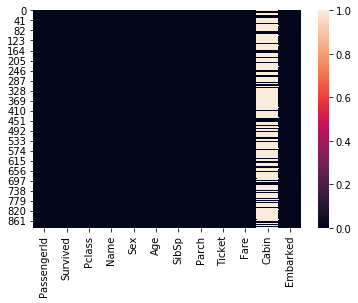

In [21]:
sns.heatmap(data.isnull())

As Cabin has soo many null values it has to be dropped,along with Cabin,PassengerID,Ticket because they are string variable

In [22]:
data.drop(['Cabin','PassengerId',"Ticket","Name"], axis=1, inplace=True)

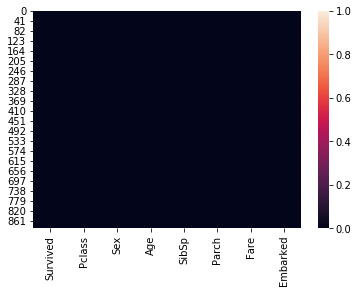

In [23]:
sns.heatmap(data.isnull())

## Converting categorical features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [24]:
sex = pd.get_dummies(data['Sex'], drop_first=True) #Creates a dummy column male with 0 for female and 1 for male
embark = pd.get_dummies(data['Embarked'], drop_first=True) #Creates a dummy column Q and S with 0 for female and 1 for 

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
data = pd.concat([data,sex,embark], axis=1) #joined the S and Q and male column with data DataFrame

In [27]:
data.drop(["Sex","Embarked"],axis = 1,inplace = True)

In [28]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Training & Testing the Data

In [29]:
X = data.drop('Survived', axis = 1)
y = data[['Survived']]

In [30]:
#importing Random Forest machine learning library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [32]:
print("Shape of X_train is",X_train.shape)
print("Shape of y_train is",y_train.shape)
print("Shape of X_test is",X_test.shape)
print("Shape of y_test is",y_test.shape)

Shape of X_train is (712, 8)
Shape of y_train is (712, 1)
Shape of X_test is (179, 8)
Shape of y_test is (179, 1)


In [33]:
rfc = RandomForestClassifier()

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
y_pred = rfc.predict(X_test)

In [36]:
rfc.score(X_train, y_train)

0.9648876404494382

In [37]:
rfc.score(X_test, y_test)

0.7932960893854749

## Evaluation:
We can check precision using classification report


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.82      0.69      0.75        80

   micro avg       0.79      0.79      0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179



### CONCLUSION:
#### Hence we can predict the survival of a person on Titanic Ship with 80% accuracy